<h1 style="font-family: garamond; font-size: 50px; font-style: normal; letter-spcaing: 3px; border-radius: 100px 100px; text-align:center ;">
How Boosting and Bagging help? </h1>


<h1 style="font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5;  border-radius: 100px 100px; text-align:center ;">Content List</h1>

* [1. Abstract](#1)
* [2. Background and Introduction](#2)
* [3. Libraires](#3)
* [4. Data Preview](#4)
    * [4.1 Feature discription](#4.1)
    * [4.2 Null-value proportion](#4.2)
    * [4.3 Distribution of Target Variable](#4.3)
    * [4.4 Distribution of Predictors](#4.4)
* [5. Data Porcessing](#5)
    * [5.1 Transformation](#5.1)
    * [5.2 Resampling](#5.2)
    * [5.3 Correlation](#5.3)
    * [5.4 Standarilization](#5.4)
* [6. Model analysis](#6)
    * [6.1 Comparision without hyperparametor tunning](#6.1)
         * [6.1.1 Naive Bayes](#6.1.1)
         * [6.1.2 Perceptron](#6.1.2)
         * [6.1.3 KNN](#6.1.3)
         * [6.1.4 SVM](#6.1.4)
         * [6.1.5 Decision Tree](#6.1.5)
    * [6.2 Bagging and Boosting](#6.2)
         * [6.2.1 Random Forest](#6.2.1)
         * [6.2.2 XGBoosting](#6.2.2)
         * [6.2.3 Boosting](#6.2.3)
         * [6.2.4 Voting Classifier](#6.2.4)
    * [6.3 Analysis](#6.6)

<a id = '1'></a>
<h1 style="font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5;  border-radius: 100px 100px; text-align:center ;">Abstract</h1>

<h1 style="font-family: garamond;font-size: 20px; font-style: normal; letter-spcaing: 5px; line-height: 2em">
    
In order to get a better understanding of ensemble methods. I choose a breast cancer dataset to build models on. Latter on, I notice this is a linear seperable dataset, because SVM and perceptron perform surprisingly excellently. After boostraps like random forest and xgboosting, decision tree's initial performance of 93% is greatly increased to 98%. KNN, perceptron and naive bayes are increased by boosting around 2%, this is actually nice since their initial performance are already exceeded 93%. I also try voting classifier based on 5 model, it yeilds the highest accuracy,and it is one of the most poweful ensemble methods.

<a id = '2'></a>
<h1 style="font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5;  border-radius: 100px 100px; text-align:center ;">About Dataset</h1>

<h1 style="font-family: garamond;font-size: 20px; font-style: normal; letter-spcaing: 5px; line-height: 2em">
    
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
    
And the 3-dimensional space is that described in: 
    
[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
    
ftp ftp.cs.wisc.edu
    
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29   
</h1>

<a id = '3'></a>
<h1 style="font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5;  border-radius: 100px 100px; text-align:center ;">Libraires</h1>

<h1 style="font-size: 20px; font-style: normal; letter-spcaing: 5px; line-height: 2em">
    
Here are the python libraires i used in this case study, including basic libraries, visulaization modules, dataset handling modules and machine learning modules.
</h1>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from imblearn.over_sampling import SMOTE

# machine learning modules
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.svm import SVC

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [3]:
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

<a id = '4'></a>
<h1 style="font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5;  border-radius: 100px 100px; text-align:center ;">Data Preview</h1>

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<a id = '4.1'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Feature discription</h1>

<h1 style="font-size: 18px; font-style: normal; letter-spcaing: 5px; line-height: 1em">

1. ID number

2. Diagnosis (M = malignant, B = benign)

3. radius (mean of distances from center to points on the perimeter)

4. texture (standard deviation of gray-scale values)

5. perimeter

6. area

7. smoothness (local variation in radius lengths)

8. compactness (perimeter^2 / area - 1.0)

9. concavity (severity of concave portions of the contour)

10. concave points (number of concave portions of the contour)

11. symmetry

12. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

<a id = '4.2'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Null-value proportion</h1>

<h1 style="font-size: 18px; font-style: normal; letter-spcaing: 5px; line-height: 1.2em">
    
Let's take a look at missing value proportion of each features.</h1>

In [5]:
pd.DataFrame(data = data.isna().sum()/data.shape[0]*100, columns=["Null (%)"]).style.background_gradient(cmap='summer_r')

,Null (%)
id,0.000000
diagnosis,0.000000
radius_mean,0.000000
texture_mean,0.000000
perimeter_mean,0.000000
area_mean,0.000000
smoothness_mean,0.000000
compactness_mean,0.000000
concavity_mean,0.000000
concave points_mean,0.000000


We can see that there is basiclly no null value, which is a very good thing. Then we drop some useless variables.

In [6]:
data.drop(['id','Unnamed: 32'],axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<a id = '4.3'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Distribution of Target Variable</h1>

Number of Benign:  357
Number of Malignant :  212


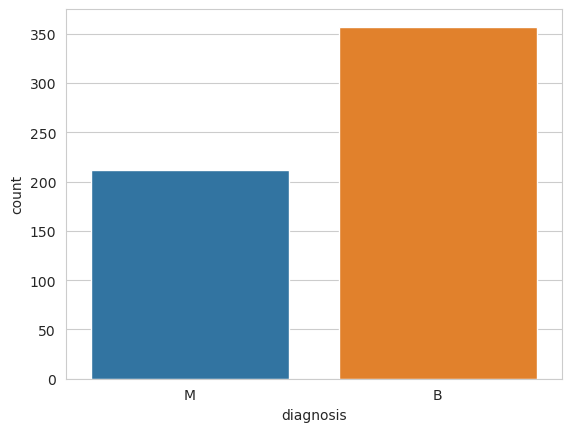

In [8]:
sns.countplot(x = data['diagnosis'])
B, M = data['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [9]:
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f"{var} Distribution Histogram")
    ax[1].set_title(f"{var} Distribution Boxplot")

    plt.show()
num = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

<a id = '4.4'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Distribution of Predictors</h1>

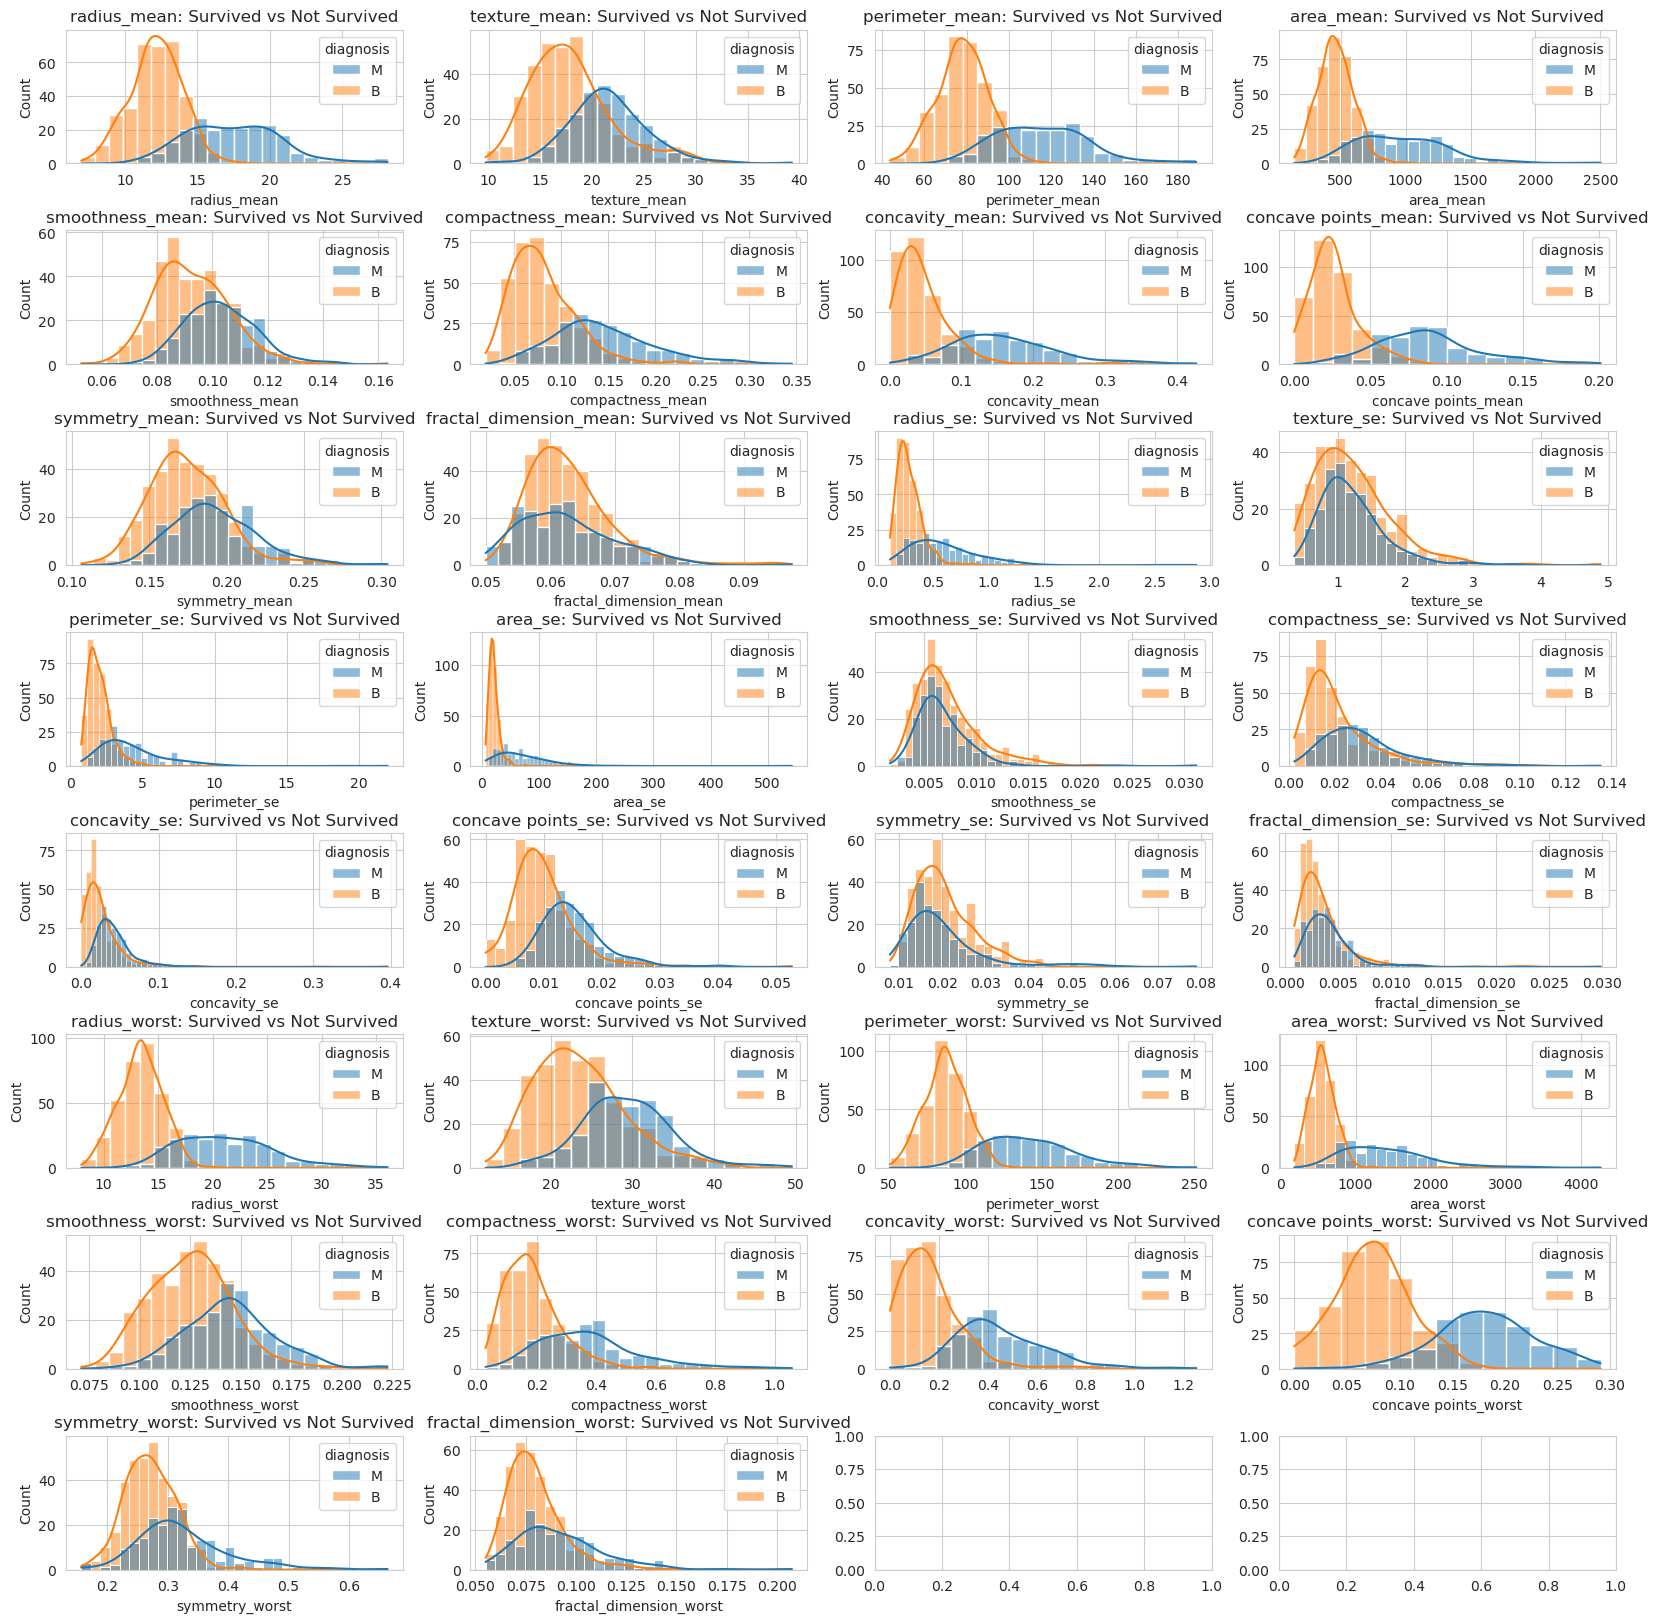

In [10]:
fig, ax = plt.subplots(8, 4, figsize=(20, 20))
ax = ax.flatten()

for i, var in enumerate(num):
    sns.histplot(data = data, x = var, hue = 'diagnosis', kde = True, ax = ax[i])
    ax[i].set_title(f"{var}: Survived vs Not Survived")
    
plt.subplots_adjust(hspace = 0.5)
plt.show()

<a id = '5'></a>
<h1 style="font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5;  border-radius: 100px 100px; text-align:center ;">Data Porcessing</h1>

<a id = '5.1'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Transformation</h1>

In [11]:
data['diagnosis'] = data['diagnosis'].map({'M' : 1, 'B' : 0})

<a id = '5.2'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Resampling</h1>

In [12]:
X = data.drop('diagnosis', axis = 1)
Y = data['diagnosis']

In [13]:
resample = SMOTE()
X, Y = resample.fit_resample(X, Y.ravel())
plt.figure(figsize = (5,5))
fig = px.pie(pd.concat([X,pd.DataFrame(Y,columns = ['diagnosis'])],axis = 1),names='diagnosis')
fig.show()

<Figure size 500x500 with 0 Axes>

<a id = '5.3'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Correlation</h1>

<AxesSubplot:>

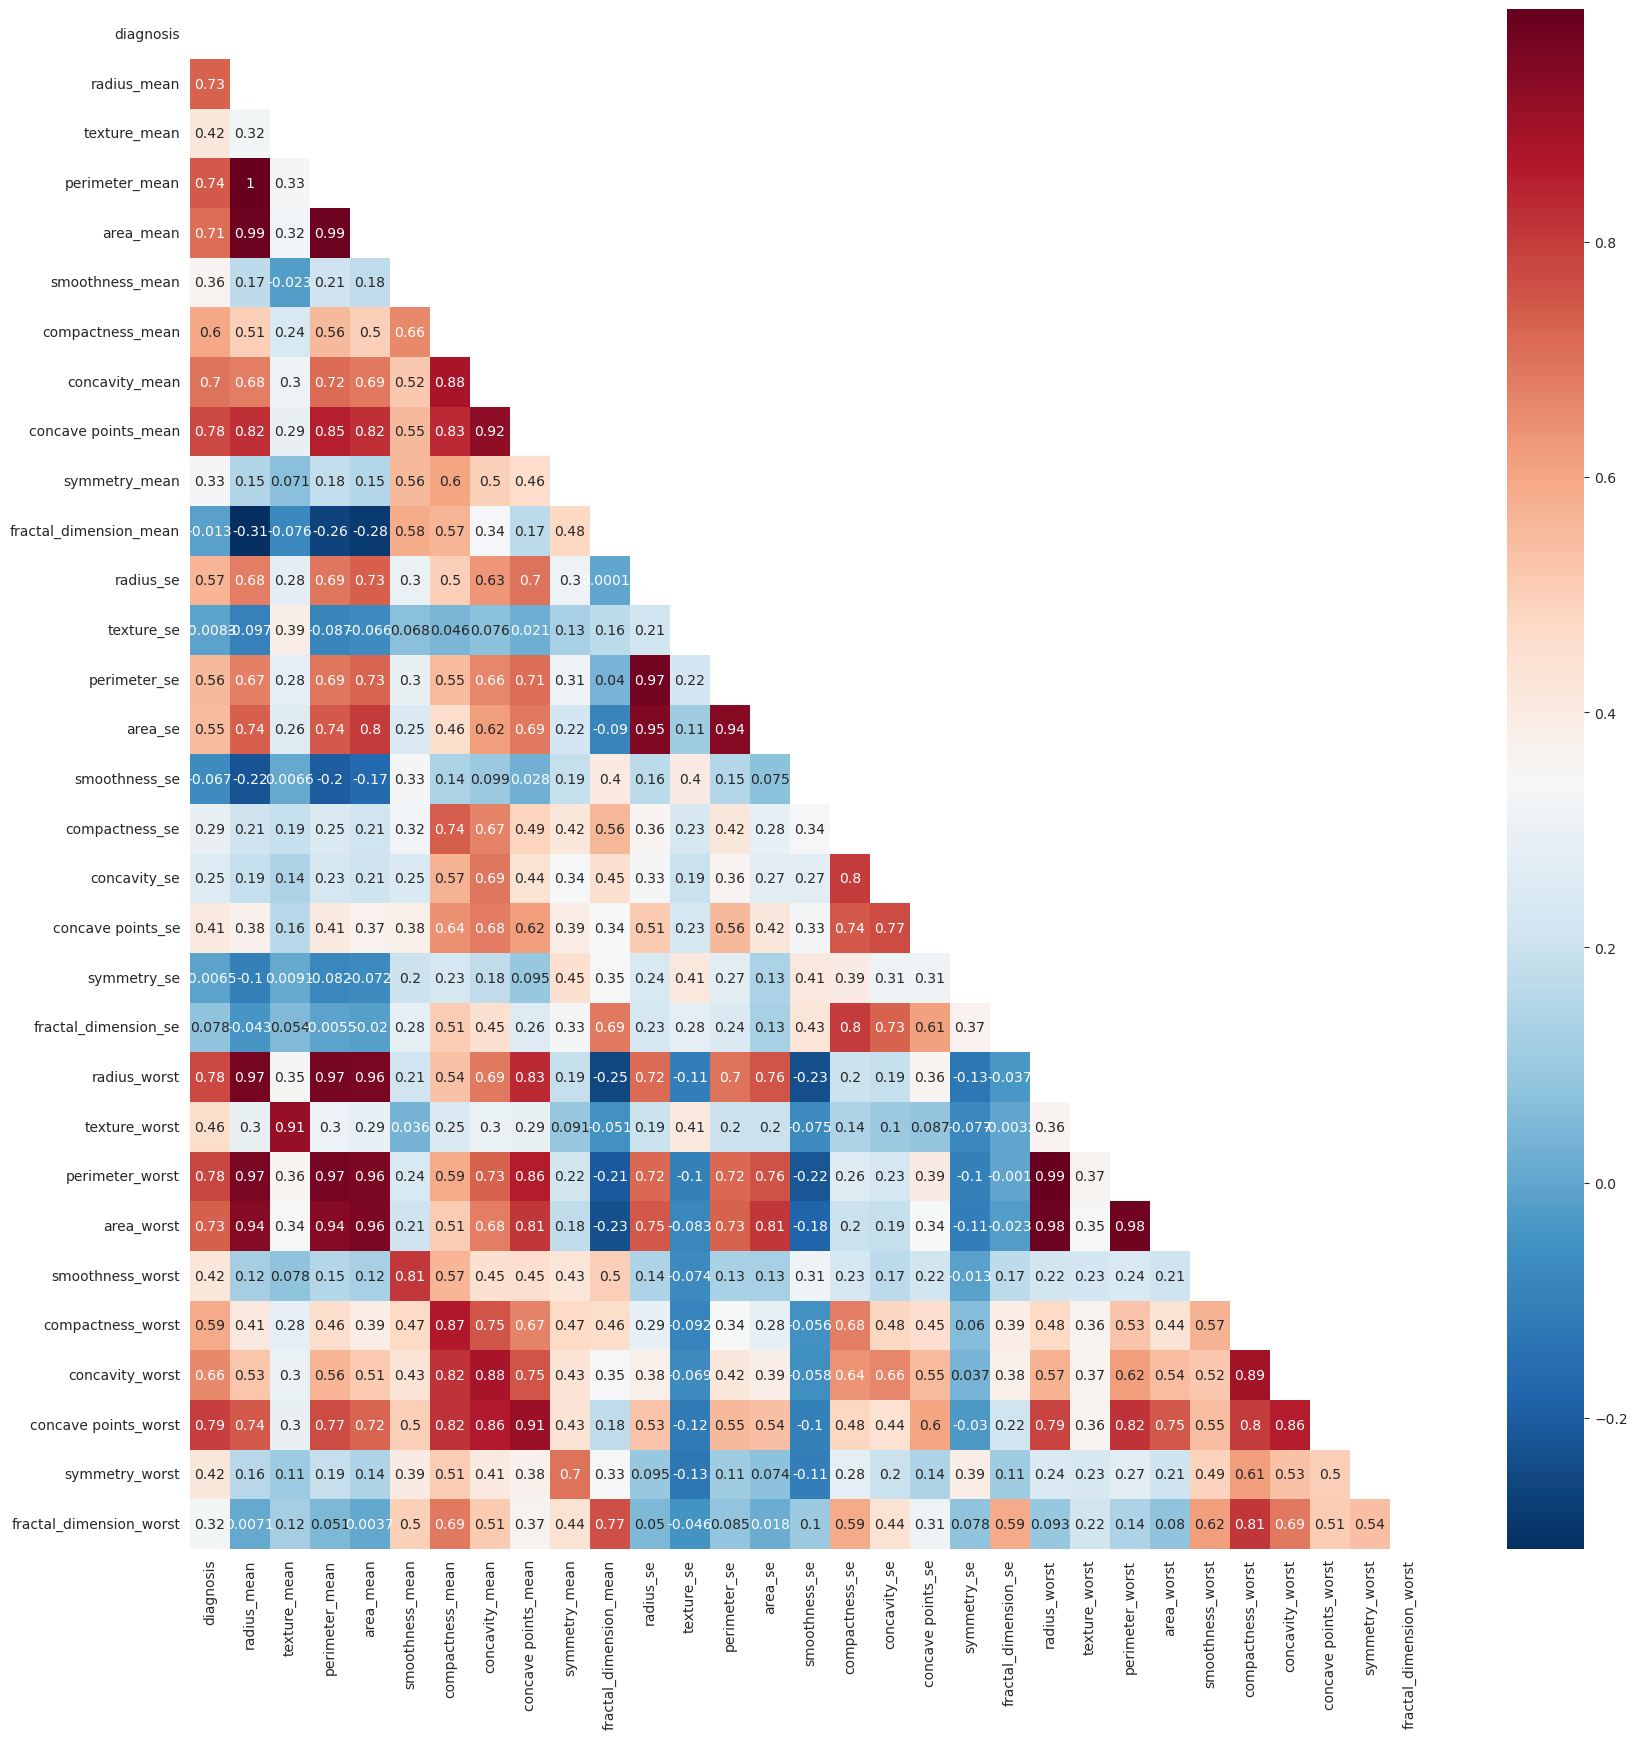

In [14]:
plt.figure(figsize = (20,20))
mask = np.triu(np.ones_like(data.corr(), dtype = bool))
sns.heatmap(data.corr(), mask = mask, annot = True, cmap="RdBu_r")

<a id = '5.4'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Standarilization </h1>

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1, )

In [16]:
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

<a id = '6'></a>
<h1 style="font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5;  border-radius: 100px 100px; text-align:center ;">Model analysis</h1>

<a id = '6.1'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Comparision without hyperparametor tunning </h1>

<h1 style="font-size: 18px; font-style: normal; letter-spcaing: 3px; line-height: 1.5em">
 I trained my data on those model without hyperparameters tunning to get a rough situation about the performance of models.
</h1>

In [17]:
seed = 1
classifiers = {
    'Per': Perceptron(random_state = seed),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(), 
    "DT": DecisionTreeClassifier(random_state = seed),
    "RF": RandomForestClassifier(random_state = seed),
    "XGB": XGBClassifier(random_state = seed),
    "SVM": SVC(random_state = seed)
}


fig = make_subplots(rows=7, cols=1,shared_xaxes=True,subplot_titles=('Perceptron','NaiveBayes','KNN','DecisionTree','RandomForest','XGBooster','SVM'))
results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
fig1 = make_subplots(rows=7, cols=1,shared_xaxes=True,subplot_titles=('Perceptron','NaiveBayes','KNN','DecisionTree','RandomForest','XGBooster','SVM'))
results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
i = 1
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X_train, Y_train, cv=10,
        scoring=(['accuracy', 'f1'])
    )
    y = cv_results['test_f1']
    y1 = cv_results['test_accuracy']
    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
    i +=1
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
print(results)

   Classifier  Avg_Accuracy  Avg_F1_Score  Avg_Overall
6         SVM      0.977638      0.976603     0.977121
0         Per      0.970231      0.968899     0.969565
2         KNN      0.970161      0.968907     0.969534
4          RF      0.964640      0.963532     0.964086
5         XGB      0.964640      0.962506     0.963573
3          DT      0.945702      0.943387     0.944545
1  NaiveBayes      0.925227      0.919123     0.922175


<h1 style="font-size: 18px; font-style: normal; letter-spcaing: 3px; line-height: 1.5em">
It seems like this data is linear seperable, so perceptron is surprisingly good; according to our correlation chart, there are several predictors are highly correlated to each other, so naive bayes do rather poorly.
</h1>

<a id = '6.1.1'></a>
<h1 style="font-family: garamond; font-size: 25px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Naive Bayes </h1>

In [18]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
prediction_NB = NB.predict(X_test)
print(confusion_matrix(Y_test, prediction_NB))
print(NB.score(X_test, Y_test))

[[77  3]
 [ 4 95]]
0.9608938547486033


<a id = '6.1.2'></a>
<h1 style="font-family: garamond; font-size: 25px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Perceptron </h1>

In [19]:
Per = Perceptron(random_state = seed)
Per.fit(X_train, Y_train)
prediction_Per = Per.predict(X_test)
print(confusion_matrix(Y_test, prediction_Per))
print(Per.score(X_test, Y_test))

[[77  3]
 [ 3 96]]
0.9664804469273743


<a id = '6.1.3'></a>
<h1 style="font-family: garamond; font-size: 25px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">KNN </h1>

In [20]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
prediction_KNN = KNN.predict(X_test)
print(confusion_matrix(Y_test, prediction_KNN))
print(KNN.score(X_test, Y_test))

[[78  2]
 [ 2 97]]
0.9776536312849162


<a id = '6.1.4'></a>
<h1 style="font-family: garamond; font-size: 25px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">SVM </h1>

In [21]:
SVM = SVC(random_state = seed)
SVM.fit(X_train, Y_train)
prediction_SVM = SVM.predict(X_test)
print(confusion_matrix(Y_test, prediction_SVM))
print(SVM.score(X_test, Y_test))

[[77  3]
 [ 2 97]]
0.9720670391061452


<a id = '6.1.5'></a>
<h1 style="font-family: garamond; font-size: 25px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Decision Tree </h1>

In [22]:
dt = DecisionTreeClassifier(random_state = seed)
dt_param_grid = {"max_depth": [10, 15, 20, 30],
              "max_features": [10, 15, 20, 30],
              "min_samples_leaf": [1, 2, 3, 10, 15],
              "criterion": ["gini"]}

gs_dt = GridSearchCV(dt, param_grid = dt_param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)
gs_dt.fit(X_train, Y_train)
DT = gs_dt.best_estimator_
print(DT)
print(gs_dt.best_score_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
DecisionTreeClassifier(max_depth=10, max_features=30, min_samples_leaf=2,
                       random_state=1)
0.9514325646401118


In [23]:
prediction_DT = DT.predict(X_test)
print(confusion_matrix(Y_test, prediction_DT))
print(DT.score(X_test, Y_test))

[[74  6]
 [ 4 95]]
0.9441340782122905


<a id = '6.2'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Bagging and Boosting </h1>

<a id = '6.2.1'></a>
<h1 style="font-family: garamond; font-size: 25px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Random Forest </h1>

In [24]:
rf = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[100,200,300],
              "criterion": ["gini"]}

gs_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)
gs_rf.fit(X_train, Y_train)
RF = gs_rf.best_estimator_
print(RF)
print(gs_rf.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
RandomForestClassifier(max_features=10, n_estimators=200)
0.9683438155136269


In [25]:
prediction_RF = RF.predict(X_test)
print(confusion_matrix(Y_test, prediction_RF))
print(RF.score(X_test, Y_test))

[[77  3]
 [ 1 98]]
0.9776536312849162


<a id = '6.2.2'></a>
<h1 style="font-family: garamond; font-size: 25px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">XGB </h1>

In [ ]:
xgb = XGBClassifier(random_state = 1)
xgb_param_grid = {
    'booster': ('gbtree','gbliner'),
    'learning_rate': (0.4, 0.3, 0.2, 0.1),
    'max_depth': [4, 5, 6],
    'gamma':[i/10.0 for i in range(0,5)]   
}
Xgb = GridSearchCV(xgb, xgb_param_grid, cv=10)
Xgb.fit(X_train, Y_train)
XGB = Xgb.best_estimator_
print(XGB)
print(Xgb.best_score_)

In [ ]:
prediction_XGB = XGB.predict(X_test)
print(confusion_matrix(Y_test, prediction_XGB))
print(XGB.score(X_test, Y_test))

### Learning Curve

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
kfold = 10
g = plot_learning_curve(Per,"Perceptron mearning curves",X_train, Y_train, cv = kfold)
g = plot_learning_curve(NB,"GaussianNB learning curves",X_train, Y_train,cv=kfold)
g = plot_learning_curve(KNN,"KNeighborsClassifier learning curves",X_train, Y_train,cv = kfold)
g = plot_learning_curve(DT,"DecisionTreeClassifier learning curves",X_train, Y_train,cv = kfold)
g = plot_learning_curve(RF,"RandomForestClassifie learning curves",X_train, Y_train,cv = kfold)
g = plot_learning_curve(XGB,"XGBoosting mearning curves",X_train, Y_train,cv = kfold)

<a id = '6.2.3'></a>
<h1 style="font-family: garamond; font-size: 25px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Bagging classifier </h1>

<h1 style="font-size: 15px; font-style: normal; letter-spcaing: 3px; line-height: 1.5em">
I use Naive Bayes, Perceptron and KNN to form bagging classifiers individually.
</h1>

In [ ]:
gnb = GaussianNB()
per = Perceptron(random_state = seed)
KNN =  KNeighborsClassifier()
base_methods = [gnb, per, KNN]

for bm  in base_methods:
    print("Method: ", bm)
    bag_model = BaggingClassifier(base_estimator = bm, n_estimators = 50, bootstrap_features = True)
    bag_model = bag_model.fit(X_train,Y_train)
    Y_test_pred = bag_model.predict(X_test)
    print(bag_model.score(X_test, Y_test))

<h1 style="font-size: 15px; font-style: normal; letter-spcaing: 3px; line-height: 1.5em">
Improvement have been made, even though they are actually good enough(larger than 90%)
</h1>

<a id = '6.2.4'></a>
<h1 style="font-family: garamond; font-size: 25px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Voting Classifier</h1>

<h1 style="font-size: 15px; font-style: normal; letter-spcaing: 3px; line-height: 1.5em">
A voting classifier is an ensemble learning method, and it is a kind of wrapper contains different machine learning classifiers to classify the data with combined voting. There are 'hard/majority' and 'soft' voting methods to make a decision regarding the target class. Hard voting decides according to vote number which is the majority wins. In soft voting, we can set weight value to give more priorities to certain classifiers according to their performance.
</h1>


In [ ]:
base_methods = [('DecisionTree', DT),
                ('GaussianNB', NB),   
              ('KNeighbors',KNN),
              ('XGB', XGB),   
              ('Perceptron', Per),
              ('SVM', SVM),
              ('RandomForest', RF)]
vote_model = VotingClassifier(estimators = base_methods)
vote_model = vote_model.fit(X_train, Y_train)
Y_test_pred = vote_model.predict(X_test)
vote_model.score(X_test, Y_test)

<a id = '6.3'></a>
<h1 style="font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px;border-radius: 100px 100px;">Analysis </h1>

<h1 style="font-size: 18px; font-style: normal; letter-spcaing: 3px; line-height: 1.5em">
SVM and perceptron perform excellently since the data set is linearly separable.
    
After boostraps like random forest and xgboosting, decision tree's initial performance of 93% is greatly increased to 98%.
    
KNN, perceptron and naive bayes are increased by boosting around 2%, this is actually nice since their initial performance are already exceeded 93%.
    
I also try voting classifier based on 5 model, it yeilds the highest accuracy.
</h1>